In [1]:
import zipfile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# unzip the raw data
ds_path = '../data/raw/'
with zipfile.ZipFile(ds_path + 'ml-100k.zip', 'r') as zip_ref:
        zip_ref.extractall(ds_path)

In [3]:
data_path = ds_path + 'ml-100k/'

## Read the datasets

1. Read the dataset of ratings and check missing values

In [4]:
# Check the info about ratings data
!cat {data_path + 'u.info'}

943 users
1682 items
100000 ratings


In [5]:
ratings_cols = ['user_id', 'movie_id', 'rating', 'timestamp']

ratings_ds = pd.read_csv(data_path + 'u.data', 
                         delimiter='\t', 
                         names=ratings_cols)
ratings_ds.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [6]:
ratings_ds['user_id'].values.min(), ratings_ds['user_id'].values.max()

(1, 943)

In [7]:
ratings_ds['movie_id'].values.min(), ratings_ds['movie_id'].values.max()

(1, 1682)

In [8]:
print("No missing values:", ratings_ds.isna().sum().sum() == 0)

No missing values: True


2. Read the dataset of movies and check missing values

In [9]:
# Check the list of genres
!cat {data_path + 'u.genre'}

unknown|0
Action|1
Adventure|2
Animation|3
Children's|4
Comedy|5
Crime|6
Documentary|7
Drama|8
Fantasy|9
Film-Noir|10
Horror|11
Musical|12
Mystery|13
Romance|14
Sci-Fi|15
Thriller|16
War|17
Western|18



In [10]:
movies_cols = ['movie_id', 'movie_title', 'release_date', 'video_release_date', 'imdb_url', 
               'unknown', 'action', 'adventure', 'animation', 'childrens', 'comedy', 'crime', 
               'documentary', 'drama', 'fantasy', 'film-noir', 'horror', 'musical', 'mystery', 'romance', 'sci-fi', 'thriller', 'war', 'western']

movies_ds = pd.read_csv(data_path + 'u.item', 
                         delimiter='|', 
                         encoding='latin-1',
                         names=movies_cols)
movies_ds.head()

,movie_id,movie_title,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,childrens,...,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [11]:
print("No missing values:", movies_ds.isna().sum().sum() == 0)

No missing values: False


In [12]:
cols_nan = movies_ds.columns[movies_ds.isna().sum() != 0].values.tolist()

print("Columns with NaN values:")
for col in cols_nan:
    print(col)

Columns with NaN values:
release_date
video_release_date
imdb_url


In [13]:
# I decided to remove columns containing NaNs
movies_ds.drop(columns=cols_nan, inplace=True)

3. Read the dataset of users and check missing values

In [14]:
users_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']

users_ds = pd.read_csv(data_path + 'u.user', 
                        delimiter='|', 
                        encoding='latin-1',
                        names=users_cols)

users_ds.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [15]:
print("No missing values:", users_ds.isna().sum().sum() == 0)

No missing values: True


After reading the datasets, let's move to data exploration.

## Data exploration

Let's explore some key features:
1. Ratings 
2. Genres
3. Users' ages
4. Users' gender
5. Users' occupation

In [16]:
# function to plot the distribution of categorical variables
def plot_bar(ds, col, figsize=(8, 6)):
    plt.figure(figsize=figsize)
    sns.barplot(x=ds.groupby(col).size().index, 
            y=ds.groupby(col).size().values, 
            hue=ds.groupby(col).size().index,
            palette='husl', 
            legend=False)
    
    plt.title(f'Distribution of {col}s')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    

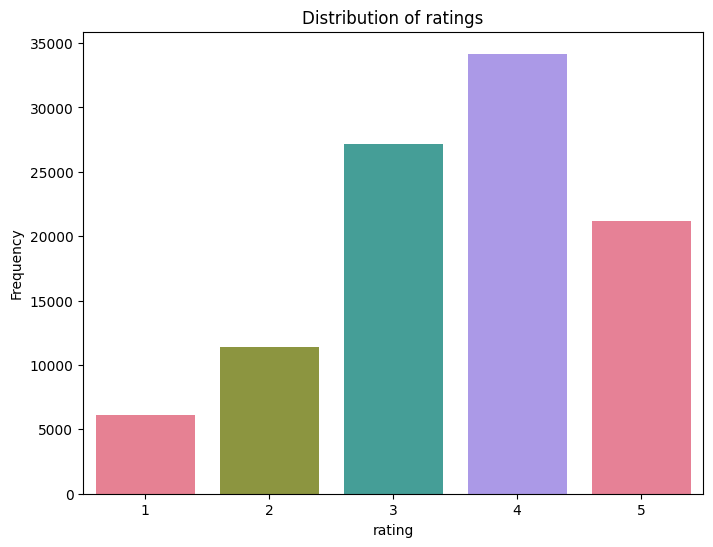

In [17]:
plot_bar(ratings_ds, 'rating')
plt.show()

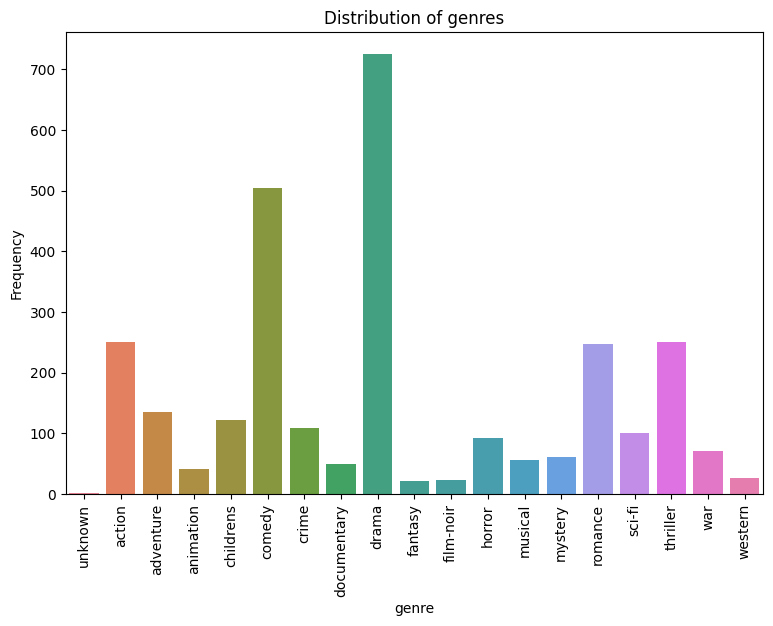

In [18]:
plt.figure(figsize=(9, 6))
genres = movies_cols[5:]
sns.barplot(x=movies_ds.loc[:, genres].sum().index, 
            y=movies_ds.loc[:, genres].sum().values, 
            hue=movies_ds.loc[:, genres].sum().index,
            palette='husl',
            legend=False)

plt.title('Distribution of genres')
plt.xlabel('genre')
plt.ylabel('Frequency')
plt.xticks(rotation=90, fontsize=10)
plt.show()

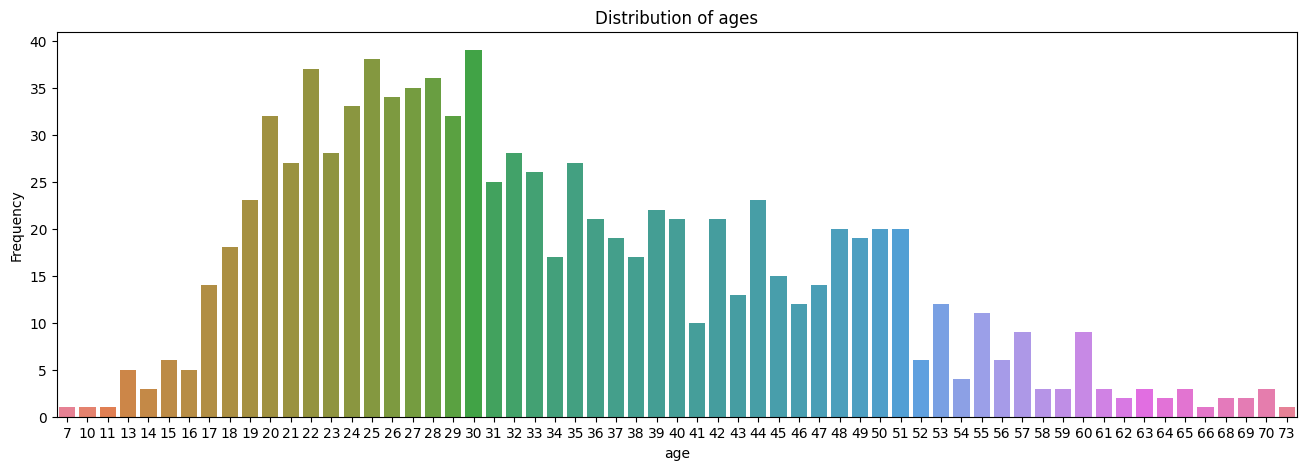

In [19]:
plot_bar(users_ds, 'age', figsize=(16, 5))
plt.show()

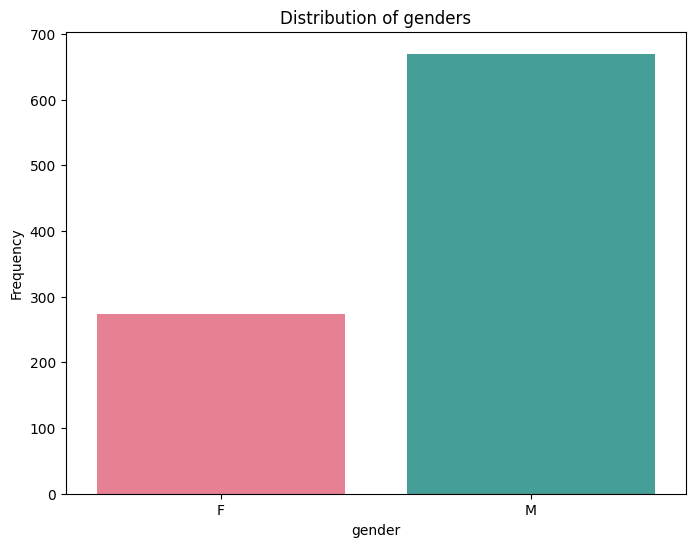

In [20]:
plot_bar(users_ds, 'gender')
plt.show()

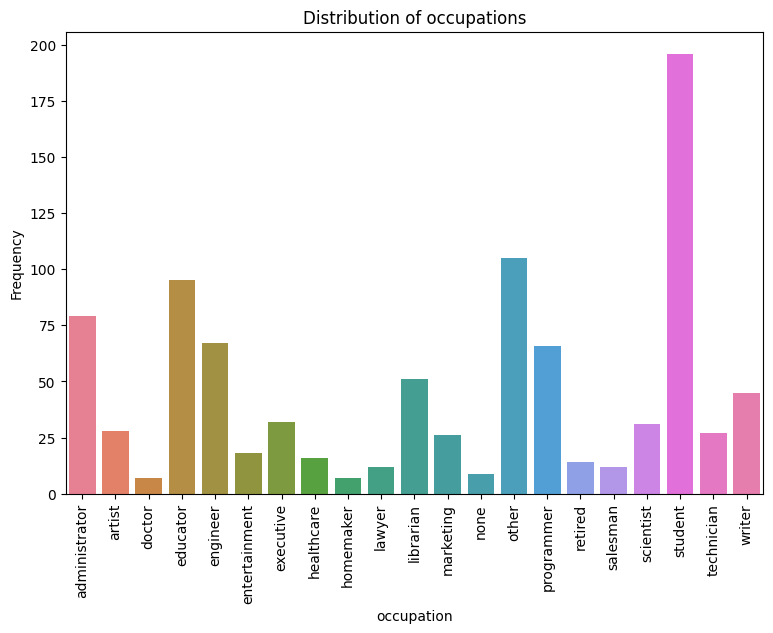

In [21]:
plot_bar(users_ds, 'occupation', figsize=(9, 6))
plt.xticks(rotation=90, fontsize=10)
plt.show()

Here are some key findings from the data exploration:

- The users and movies ids start from 1 (not 0). Should be taken into account in the further steps;
- Most of the ratings > 3, which indicates that in the data there are a large number of positive ratings from users;
- Genres `drama` and `comedy` are the most popular, while `unknown` and `fantasy` are the least popular genres;
- The age group of 17-35 constitutes the largest portion of users;
- There is a higher proportion of male users compared to female users.;
- The most common activity of rating movies is among students.